In [160]:
import re 
import spacy
nlp = spacy.load("en_core_web_sm")

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np
from collections import Counter

# # freq +s"\[\* *\]" +t*PAR +d6 *.cha
filename = "C:/Users/imruh/Documents/Uni/thesis/text generation/datafiles/clan_outputs/word_error_info_new.cha"

In [161]:
ipa = ['æ', 'é', 'ð', 'ü', 'ŋ', 'ɑ', 'ɒ', 'ɔ', 'ə', 'ɚ', 'ɛ', 'ɜ', 'ɝ', 'ɡ', 'ɪ', 'ɹ', 'ɾ',
       'ʃ', 'ʊ', 'ʒ', 'ʔ', 'ʤ', 'ʧ', 'ː', '˞', '͡', 'θ', 'ʌ']

def preprocess(word_p):
    for special_character in ipa:
        word_p = word_p.replace(special_character, "")

    pattern1 = r"@u *\[: (.*?)]"
    pattern2 = r"\b\w*@u\w*\b"
    news = re.findall(pattern1, word_p)
    olds = re.findall(pattern2, word_p)
    if len(news) == len(olds):
        for new, old in zip(news, olds):
             if "x@n" in new:
                word_p = word_p.replace(old, "")
             else:
                word_p = word_p.replace(old, new)
    
    word_p = word_p.replace(':','')
    word_p = word_p.replace('^','')
    word_p = word_p.replace('(','')
    word_p = word_p.replace(')', '')
    return word_p

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

# Find most common semantic errors

Text(0.5, 0, 'Error code')

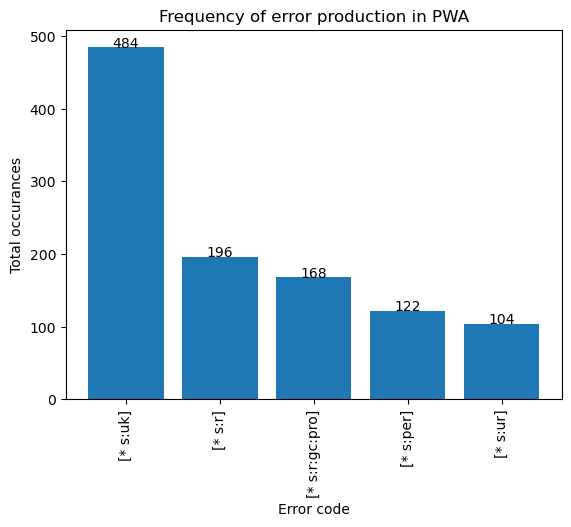

In [162]:
ipa = ['æ', 'é', 'ð', 'ü', 'ŋ', 'ɑ', 'ɒ', 'ɔ', 'ə', 'ɚ', 'ɛ', 'ɜ', 'ɝ', 'ɡ', 'ɪ', 'ɹ', 'ɾ',
       'ʃ', 'ʊ', 'ʒ', 'ʔ', 'ʤ', 'ʧ', 'ː', '˞', '͡', 'θ', 'ʌ']

errs = []
suk = []
sr = []
srgcpro = []
sper = []
sur = []
# freq +s"\[\* *\]" +t*PAR +d6 *.cha
with open(filename, encoding="utf8") as file:
    for line in file:
        if re.match(r'(?: {6})(?! )', line) or re.match(r'(?: {5})(?! )', line):
            # print(line)
            split = line.split('[')
            err = preprocess(split[0])
            line = err + ' [' + '['.join(split[1:])
            num = int(re.search('[0-9]+', line).group())
            words = re.findall(r"(\w+)", line)
            
            if re.search('\[\* s.+\]', line) is not None:
                # print(words)
                doc = nlp(words[1])
                for tok in doc:
                    pos = tok.pos_
                    word = tok.text
                    break
                err = re.search('\[\* s.+\]', line).group(0)
                err = re.findall('\[.*?\]', err)
                if type(err) is list:
                    for e in err:
                        errs.extend([e]*num)
                else:
                    errs.extend([err]*num)
                if '[* s:uk]' in err: 
                    suk.extend([pos]*num)
                if '[* s:r]' in err:
                    sr.extend([pos]*num)
                    if len(sr) != Counter(errs)['[* s:r]']:
                        print(err, num, line)
                if '[* s:r:gc:pro]' in err:
                    srgcpro.extend([pos]*num)
                if '[* s:per]' in err:
                    sper.extend([pos]*num)
                if '[* s:ur]' in err:
                    sur.extend([pos]*num)

counter = Counter(errs)
freq_list = sorted(counter.items(), key=lambda x:x[1], reverse=True)
sorted_freq = dict(freq_list)
common = dict(freq_list[:5])
from matplotlib import pyplot as plt
plt.style.use('default')
plt.bar(*zip(*common.items()))
plt.xticks(rotation=90)
addlabels(*zip(*common.items()))
plt.title("Frequency of error production in PWA")
plt.ylabel("Total occurances")
plt.xlabel("Error code")

# Stacked bar chart of POS of top 5 semantic errors and top 5 morphological errors

In [163]:
print(len(suk), len(sr), len(srgcpro), len(sper), len(sur))

484 196 168 122 104


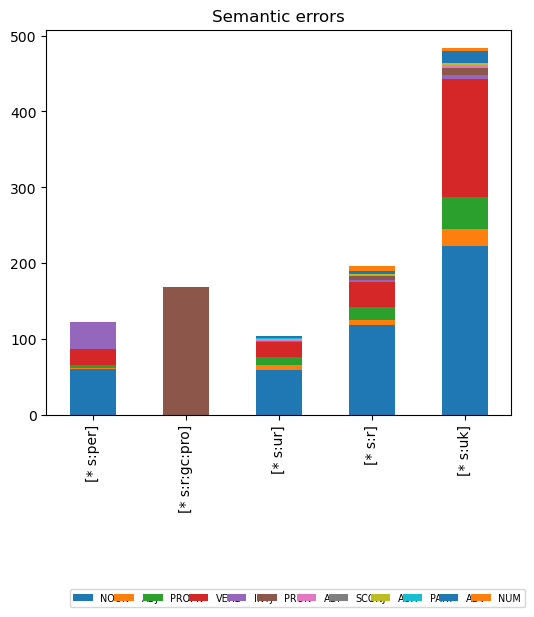

In [164]:
pos_unique = list(set(suk + sr + srgcpro + sper + sur))
pos_unique.append("ERROR")

df_main_semantic = pd.DataFrame(columns=pos_unique)

titles = ["[* s:uk]", "[* s:r]", "[* s:ur]", "[* s:r:gc:pro]", "[* s:per]"]
for x, title in zip([suk,sr,sur,srgcpro,sper], titles):
    counts = dict(Counter(x))
    counts = {k:[v] for k,v in counts.items()}  # WORKAROUND
    df = pd.DataFrame.from_dict(counts)
    df['ERROR'] = title
    df_main_semantic = pd.concat([df, df_main_semantic])
    
df_main_semantic = df_main_semantic.fillna(0)
plt.rcParams["figure.figsize"] = (6, 5)

df_main_semantic.plot.bar(x="ERROR", stacked=True, title='Semantic errors', xlabel='')
plt.legend(loc=(0.05, -0.5), ncol=len(df_main_semantic.columns)-1, mode="expand", fontsize='x-small')
plt.show()

# Find out most common morphological errors

Text(0.5, 0, 'Error code')

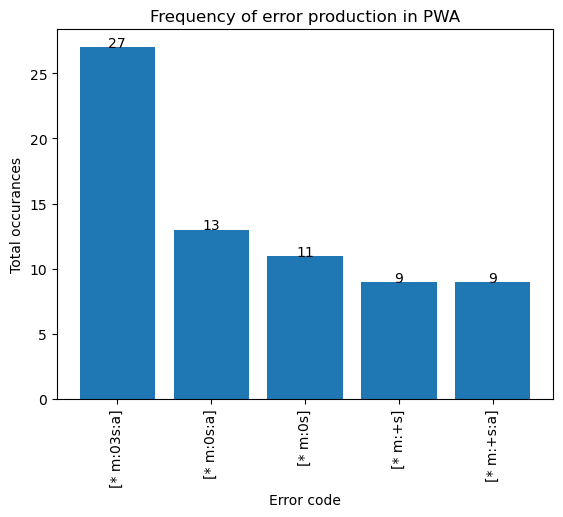

In [165]:
ipa = ['æ', 'é', 'ð', 'ü', 'ŋ', 'ɑ', 'ɒ', 'ɔ', 'ə', 'ɚ', 'ɛ', 'ɜ', 'ɝ', 'ɡ', 'ɪ', 'ɹ', 'ɾ',
       'ʃ', 'ʊ', 'ʒ', 'ʔ', 'ʤ', 'ʧ', 'ː', '˞', '͡', 'θ', 'ʌ']

errs = []
m03sa = []
m0sa = []
m0s = []
ms = []
msa = []
# freq +s"\[\* *\]" +t*PAR +d6 *.cha
with open(filename, encoding="utf8") as file:
    for line in file:
        if re.match(r'(?: {6})(?! )', line) or re.match(r'(?: {5})(?! )', line):
            # print(line)
            split = line.split('[')
            err = preprocess(split[0])
            line = err + ' [' + '['.join(split[1:])
            num = int(re.search('[0-9]+', line).group())
            words = re.findall(r"(\w+)", line)
            
            if re.search('\[\* m.+\]', line) is not None:
                # print(words)
                doc = nlp(words[1])
                for tok in doc:
                    pos = tok.pos_
                    word = tok.text
                    break
                err = re.search('\[\* m.+\]', line).group(0)
                err = re.findall('\[.*?\]', err)
                if type(err) is list:
                    for e in err:
                        errs.extend([e]*num)
                else:
                    errs.extend([err]*num)
                if '[* m:03s:a]' in err: 
                    m03sa.extend([pos]*num)
                if '[* m:0s:a]' in err:
                    m0sa.extend([pos]*num)
                    # if len(sr) != Counter(errs)['[* s:r]']:
                    #     print(err, num, line)
                if '[* m:0s]' in err:
                    m0s.extend([pos]*num)
                if '[* m:+s]' in err:
                    ms.extend([pos]*num)
                if '[* m:+s:a]' in err:
                    msa.extend([pos]*num)

counter = Counter(errs)
freq_list = sorted(counter.items(), key=lambda x:x[1], reverse=True)
sorted_freq = dict(freq_list)
common = dict(freq_list[:5])
from matplotlib import pyplot as plt
plt.style.use('default')
plt.bar(*zip(*common.items()))
plt.xticks(rotation=90)
addlabels(*zip(*common.items()))
plt.title("Frequency of error production in PWA")
plt.ylabel("Total occurances")
plt.xlabel("Error code")

In [166]:
print(len(m03sa), len(m0sa), len(m0s), len(ms), len(msa))

27 13 11 9 9


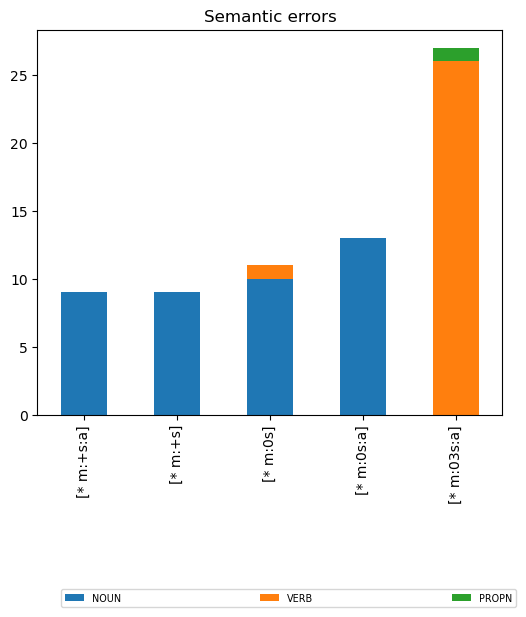

In [167]:
pos_unique = list(set(m03sa + m0sa + m0s + ms + msa))
pos_unique.append("ERROR")

df_main_semantic = pd.DataFrame(columns=pos_unique)

titles = ["[* m:03s:a]", "[* m:0s:a]", "[* m:0s]", "[* m:+s]", "[* m:+s:a]"]
for x, title in zip([m03sa,m0sa,m0s,ms,msa], titles):
    counts = dict(Counter(x))
    counts = {k:[v] for k,v in counts.items()}  # WORKAROUND
    df = pd.DataFrame.from_dict(counts)
    df['ERROR'] = title
    df_main_semantic = pd.concat([df, df_main_semantic])
    
df_main_semantic = df_main_semantic.fillna(0)
plt.rcParams["figure.figsize"] = (6, 5)

df_main_semantic.plot.bar(x="ERROR", stacked=True, title='Semantic errors', xlabel='')
plt.legend(loc=(0.05, -0.5), ncol=len(df_main_semantic.columns)-1, mode="expand", fontsize='x-small')
plt.show()